## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
data = pd.read_csv('datasets/HousePrices/dataset.csv',sep=",")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Visualization
## Sales Price Histogram (target)

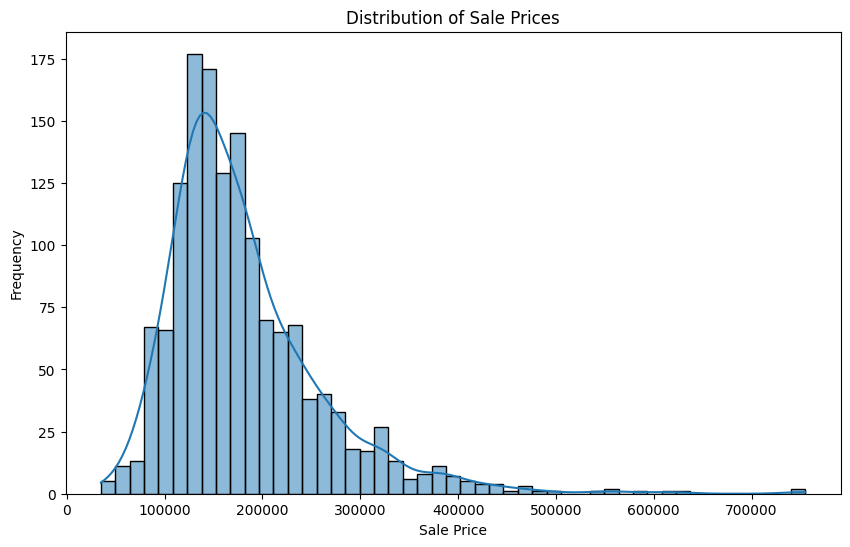

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

## Correlation Matrix

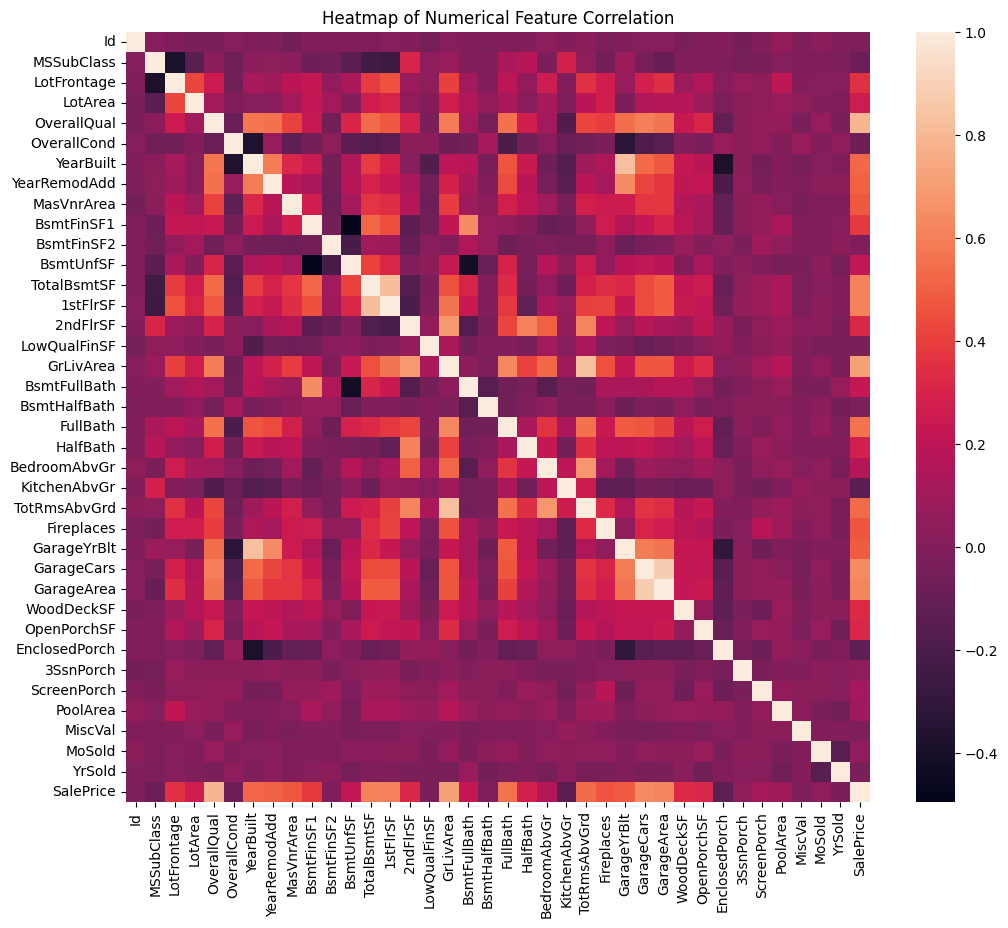

In [7]:
# Selecting only numeric columns for the correlation matrix
num_data = data.select_dtypes(include=[np.number])

# Calculating the correlation matrix
corr_matrix = num_data.corr()

# Creating the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False)
plt.title('Heatmap of Numerical Feature Correlation')
plt.show()

## Scatterplot of some characteristics in relation to the sales price

In [ ]:
sample_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']

for feature in sample_features:
    plt.figure(figsize=(8, 5))
    plt.scatter(data[feature], data['SalePrice'])
    plt.title(f'Sale Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

## Data Preprocessing
### Handling missing values for numerical features


In [ ]:
num_features = data.select_dtypes(include=[np.number])
num_features = num_features.fillna(num_features.mean())

## Handling categorical features

In [ ]:
cat_features = data.select_dtypes(include=[object])
cat_features = cat_features.fillna('Unknown')

## Combining numerical and categorical features

In [ ]:
data = pd.concat([num_features, cat_features], axis=1)

# Selecting features and target

In [ ]:
features = data.drop('SalePrice', axis=1)
target = data['SalePrice']

## Converting categorical variables into dummy variables

In [ ]:
features = pd.get_dummies(features)

## Standardizing the data

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## Splitting into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

## Training and Evaluating Models

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"{name} RMSE: {rmse}")

Of these results, Random Forest has the lowest RMSE (
29570.445), which means that, among the models tested, it was the one that best predicted the target values. Therefore, Random Forest is the best algorithm in this case.

It is important to note that Linear Regression's RMSE is extremely high compared to others. This unusually large value suggests that there may have been a problem during training or prediction with the Linear Regression model, such as a poor fit to the data or a calculation error.

In summary, the Random Forest algorithm is the best among those tested, as it has the lowest RMSE, indicating the greatest accuracy in predicting house prices.